In [1]:

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [40]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

In [48]:
df = pd.read_csv('./bitcoin2000.csv')


In [62]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date
0,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN,2019-12-12 19:00:00
1,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN,2019-12-12 20:00:00
2,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN,2019-12-12 21:00:00
3,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN,2019-12-12 22:00:00
4,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN,2019-12-12 23:00:00


In [28]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['timeUTC'] = df.index
    df['hour'] = df['timeUTC'].dt.hour
    df['dayofweek'] = df['timeUTC'].dt.dayofweek
    df['quarter'] = df['timeUTC'].dt.quarter
    df['month'] = df['timeUTC'].dt.month
    df['year'] = df['timeUTC'].dt.year
    df['dayofyear'] = df['timeUTC'].dt.dayofyear
    df['dayofmonth'] = df['timeUTC'].dt.day
    df['weekofyear'] = df['timeUTC'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='close')

features_and_target = pd.concat([X, y], axis=1)

<ipython-input-28-99f57b06d441>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['timeUTC'].dt.weekofyear


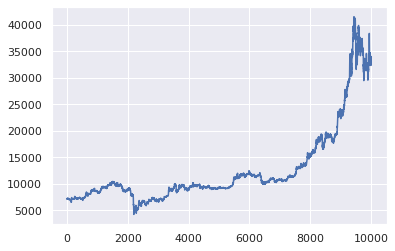

In [59]:
plt.plot(df['close'])

In [60]:
np.max(df['close'])

41490.84

In [61]:
df[df['close']==41490.84]

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date
9436,1610114400,41594.59,40979.51,41347.41,4400.6,1.816751e+08,41490.84,direct,NaN,2021-01-08 23:00:00


In [31]:
split_date = '2021-01-01'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [32]:
features_and_target.head()


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,close
timeUTC,,,,,,,,,
2019-12-12 19:00:00,19,3,4,12,2019,346,12,50,7166.14
2019-12-12 20:00:00,20,3,4,12,2019,346,12,50,7199.79
2019-12-12 21:00:00,21,3,4,12,2019,346,12,50,7199.97
2019-12-12 22:00:00,22,3,4,12,2019,346,12,50,7201.38
2019-12-12 23:00:00,23,3,4,12,2019,346,12,50,7173.50


In [49]:
df = df.rename(columns={'timeUTC': 'date'})
amzn_df=df.copy()

In [52]:
amzn_df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date
0,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN,2019-12-12 19:00:00
1,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN,2019-12-12 20:00:00
2,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN,2019-12-12 21:00:00
3,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN,2019-12-12 22:00:00
4,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN,2019-12-12 23:00:00
...,...,...,...,...,...,...,...,...,...,...
10000,1612144800,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN,2021-02-01 11:00:00
10001,1612148400,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN,2021-02-01 12:00:00
10002,1612152000,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN,2021-02-01 13:00:00
10003,1612155600,33907.89,33467.87,33576.82,1198.20,40319458.23,33803.02,direct,NaN,2021-02-01 14:00:00


In [54]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low','volumefrom','volumeto','time','conversionType','conversionSymbol'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()


,y,ds
0,7166.14,2019-12-12 19:00:00
1,7199.79,2019-12-12 20:00:00
2,7199.97,2019-12-12 21:00:00
3,7201.38,2019-12-12 22:00:00
4,7173.50,2019-12-12 23:00:00


In [55]:
m = Prophet()

m.fit(ph_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10365,2022-01-28 15:00:00,139424.018131,59812.654971,213864.691302
10366,2022-01-29 15:00:00,139700.657074,59904.415290,214255.229983
10367,2022-01-30 15:00:00,139970.309699,60197.492596,214928.740889
10368,2022-01-31 15:00:00,140131.043270,59974.549634,215841.890235
10369,2022-02-01 15:00:00,140440.054078,59184.113061,216201.496226


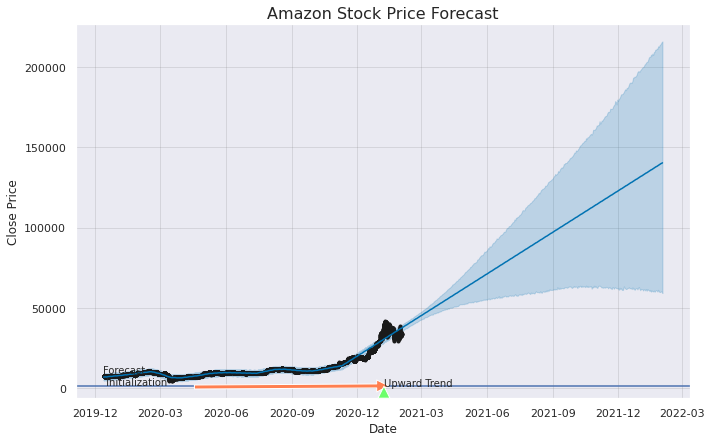

In [66]:
import datetime as dt


import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2019, 12,12)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2021, 1, 8)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2021, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

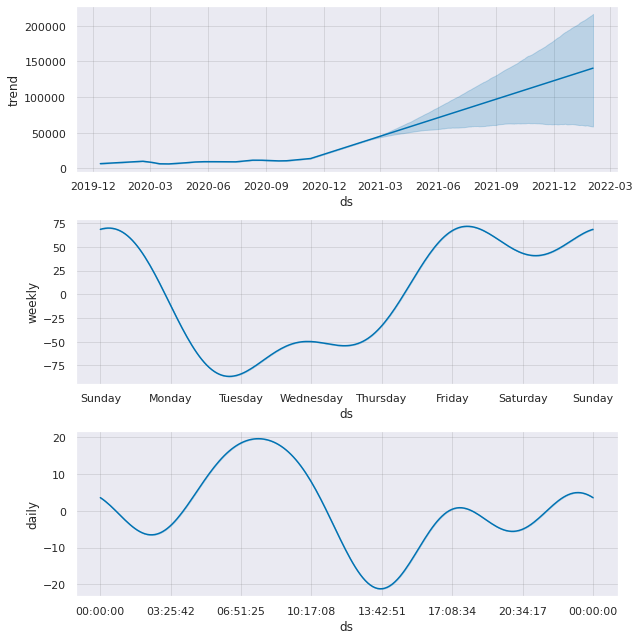

In [67]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


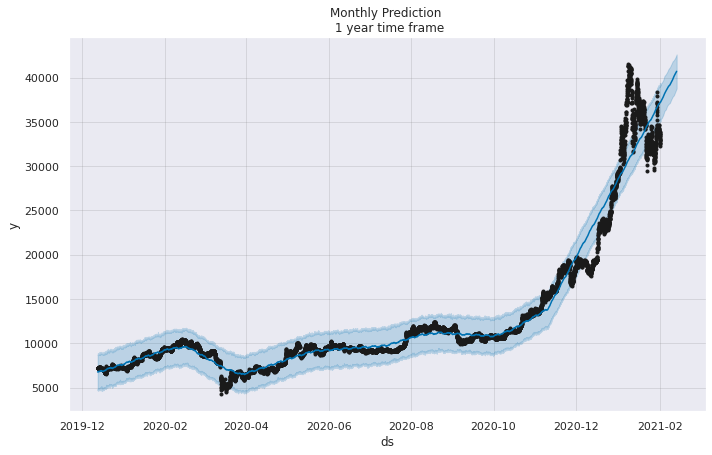

In [69]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='D')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

In [74]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

trace = go.Ohlc(x=amzn_df['date'],
                open=amzn_df['open'],
                high=amzn_df['high'],
                low=amzn_df['low'],
                close=amzn_df['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'BTC Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2020-12-09', 'x1': '2020-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2019-12-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': ''
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [79]:
m = Prophet(growth = 'logistic')
prophet_series = pd.DataFrame(list(zip(close.index, gold_price_series['price(USD)'])),columns=['ds', 'y'])
prophet_series['cap'] = 2000
prophet_series['floor'] = 250
m.fit(prophet_series)
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

NameError: name 'close' is not defined

In [76]:
future =  m.make_future_dataframe(periods=365)
future

,ds
0,2019-12-12 19:00:00
1,2019-12-12 20:00:00
2,2019-12-12 21:00:00
3,2019-12-12 22:00:00
4,2019-12-12 23:00:00
...,...
10365,2022-01-28 15:00:00
10366,2022-01-29 15:00:00
10367,2022-01-30 15:00:00
10368,2022-01-31 15:00:00


NameError: name 'prophet_series' is not defined

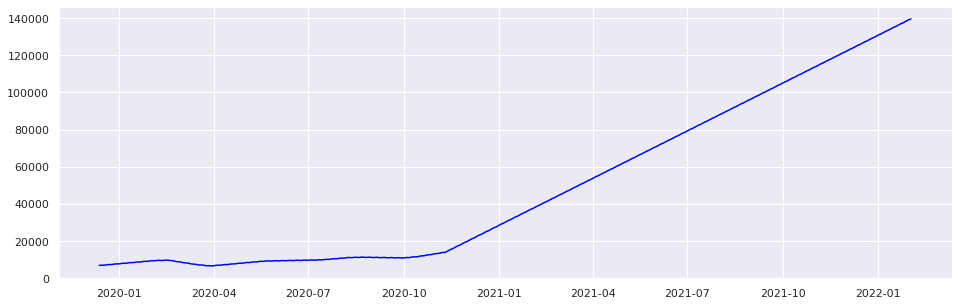

In [77]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('price(USD)')
plt.show()

In [81]:
m = Prophet() # Default growth='linear'
m.fit(ph_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [82]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10365,2022-01-28 15:00:00,139379.725391,59116.344027,224001.562411,59056.466567,223479.821903,44.292739,44.292739,44.292739,-14.795896,-14.795896,-14.795896,59.088635,59.088635,59.088635,0.0,0.0,0.0,139424.018131
10366,2022-01-29 15:00:00,139662.298861,59730.388179,223471.924324,59073.590732,223955.227548,38.358214,38.358214,38.358214,-14.795896,-14.795896,-14.795896,53.154109,53.154109,53.154109,0.0,0.0,0.0,139700.657074
10367,2022-01-30 15:00:00,139944.872330,59094.157819,225554.807800,59091.101610,224585.801954,25.437369,25.437369,25.437369,-14.795896,-14.795896,-14.795896,40.233264,40.233264,40.233264,0.0,0.0,0.0,139970.309699
10368,2022-01-31 15:00:00,140227.445799,58228.281564,225986.551614,59083.026653,225131.911896,-96.402529,-96.402529,-96.402529,-14.795896,-14.795896,-14.795896,-81.606633,-81.606633,-81.606633,0.0,0.0,0.0,140131.043270
10369,2022-02-01 15:00:00,140510.019268,59086.611705,225220.140456,59098.394204,225678.021839,-69.965190,-69.965190,-69.965190,-14.795896,-14.795896,-14.795896,-55.169295,-55.169295,-55.169295,0.0,0.0,0.0,140440.054078


In [84]:
future['cap'] = 1000
future['floor'] = 15000

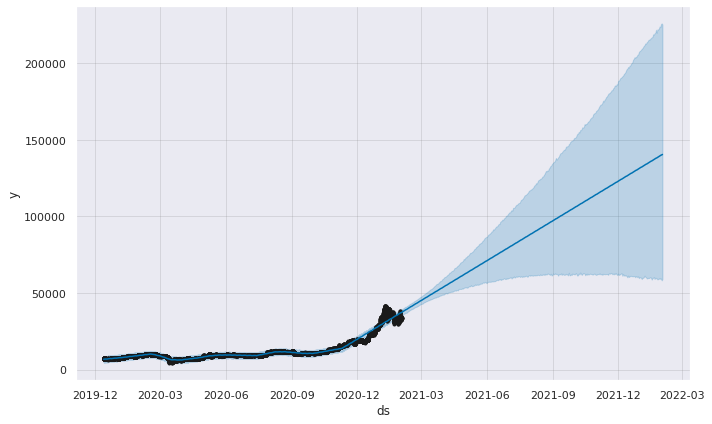

In [85]:
fig1 = m.plot(forecast)
